In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import gzip
import json
from transformers import pipeline
import math

In [2]:
data = pd.read_csv('transformed.csv')
data = data.drop(['Unnamed: 0'],axis = 1)

In [3]:
data

,waist,size,quality,cup size,hips,bra size,bust,height,fit,shoe size,shoe width,review_text,bottoms,dresses,new,outerwear,sale,tops,wedding
0,29.0,7,5.0,4.0,38.0,34.0,36.0,167.64,0,NaN,NaN,NaN,0,0,1,0,0,0,0
1,31.0,13,3.0,2.0,30.0,36.0,NaN,157.48,0,NaN,NaN,NaN,0,0,1,0,0,0,0
2,30.0,7,2.0,2.0,NaN,32.0,NaN,170.18,0,9.0,NaN,NaN,0,0,1,0,0,0,0
3,NaN,21,5.0,5.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0,0,1,0,0,0,0
4,NaN,18,5.0,2.0,NaN,36.0,NaN,157.48,0,NaN,NaN,NaN,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,NaN,8,4.0,2.0,NaN,36.0,NaN,172.72,1,8.5,2.0,1.0,0,0,0,1,0,0,0
82786,NaN,12,5.0,6.0,NaN,34.0,NaN,165.10,0,NaN,NaN,1.0,0,0,0,1,0,0,0
82787,NaN,12,5.0,7.0,36.0,32.0,NaN,162.56,1,NaN,NaN,1.0,0,0,0,1,0,0,0
82788,NaN,12,4.0,NaN,NaN,NaN,NaN,160.02,1,NaN,NaN,1.0,0,0,0,1,0,0,0


In [5]:
data.describe()

,waist,size,quality,cup size,hips,bra size,bust,height,fit,shoe size,shoe width,review_text,bottoms,dresses,new,outerwear,sale,tops,wedding
count,2882.000000,82790.000000,82722.000000,76535.000000,56064.000000,76772.000000,11854.000000,81683.000000,82790.000000,27915.000000,18607.000000,70522.000000,82790.000000,82790.000000,82790.000000,82790.000000,82790.000000,82790.000000,82790.000000
mean,31.319223,12.661602,3.949058,3.678696,40.358501,35.972125,37.499241,165.471906,0.685554,8.145818,2.129306,0.789853,0.184394,0.225269,0.259548,0.051009,0.030487,0.245972,0.003322
std,5.302849,8.271952,0.992783,1.651061,5.827166,3.224907,4.635117,7.245308,0.464298,1.336109,0.528602,0.407416,0.387808,0.417762,0.438389,0.220017,0.171923,0.430664,0.057538
min,20.000000,0.000000,1.000000,0.500000,30.000000,28.000000,20.000000,91.440000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,8.000000,3.000000,2.000000,36.000000,34.000000,34.000000,160.020000,0.000000,7.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,12.000000,4.000000,4.000000,39.000000,36.000000,36.000000,165.100000,1.000000,8.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,34.000000,15.000000,5.000000,5.000000,43.000000,38.000000,40.000000,170.180000,1.000000,9.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,50.000000,38.000000,5.000000,11.000000,60.000000,48.000000,59.000000,241.300000,1.000000,38.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

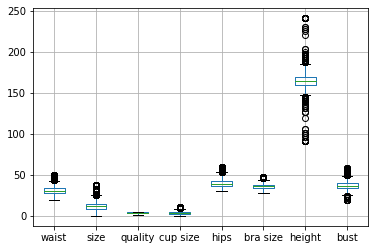

In [6]:
data.boxplot(column=['waist', 'size','quality','cup size','hips','bra size','height','bust']) 

In [7]:
def norm(df):
    for feature in ['waist','size','quality','cup size','bust','hips','bra size','height','shoe size','shoe width']:
        df[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())
    return df

In [8]:
norm_data = norm(data)

In [9]:
norm_data

,waist,size,quality,cup size,hips,bra size,bust,height,fit,shoe size,shoe width,review_text,bottoms,dresses,new,outerwear,sale,tops,wedding
0,0.300000,0.184211,1.00,0.333333,0.266667,0.3,0.410256,0.508475,0,NaN,NaN,NaN,0,0,1,0,0,0,0
1,0.366667,0.342105,0.50,0.142857,0.000000,0.4,NaN,0.440678,0,NaN,NaN,NaN,0,0,1,0,0,0,0
2,0.333333,0.184211,0.25,0.142857,NaN,0.2,NaN,0.525424,0,0.121212,NaN,NaN,0,0,1,0,0,0,0
3,NaN,0.552632,1.00,0.428571,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0,0,1,0,0,0,0
4,NaN,0.473684,1.00,0.142857,NaN,0.4,NaN,0.440678,0,NaN,NaN,NaN,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,NaN,0.210526,0.75,0.142857,NaN,0.4,NaN,0.542373,1,0.106061,0.5,1.0,0,0,0,1,0,0,0
82786,NaN,0.315789,1.00,0.523810,NaN,0.3,NaN,0.491525,0,NaN,NaN,1.0,0,0,0,1,0,0,0
82787,NaN,0.315789,1.00,0.619048,0.200000,0.2,NaN,0.474576,1,NaN,NaN,1.0,0,0,0,1,0,0,0
82788,NaN,0.315789,0.75,NaN,NaN,NaN,NaN,0.457627,1,NaN,NaN,1.0,0,0,0,1,0,0,0


<AxesSubplot:>

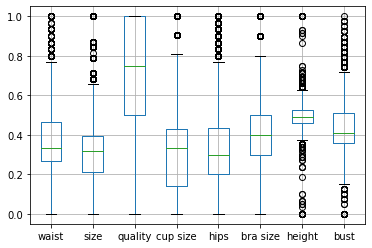

In [15]:
norm_data.boxplot(column=['waist', 'size','quality','cup size','hips','bra size','height','bust']) 